# Data Wrangling

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [3]:
#load all sheets to a dict
sheets = pd.read_excel('../Springboard Capstone Two/online_retail_II.xlsx', sheet_name=None, parse_dates=['InvoiceDate'])
sheets.keys()

dict_keys(['Year 2009-2010', 'Year 2010-2011'])

In [4]:
#concatenate all sheets into one dataframe, reset index
df = pd.concat((sheets[frame] for frame in sheets.keys()), ignore_index=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
#rename the Customer ID column
df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)

In [6]:
df.shape

(1067371, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [8]:
#convert the Customer ID data type from float to integer
df['CustomerID'] = df['CustomerID'].astype('Int64')

In [9]:
#stats for numeric columns
df[['Quantity','Price']].describe()

,Quantity,Price
count,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00
std,1.727058e+02,1.235531e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


In [10]:
#number of unique values for each column
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
CustomerID      5942
Country           43
dtype: int64

In [11]:
#frequency counts for categorical column
df['Country'].value_counts(dropna=False)

United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

In [12]:
#frequency counts for categorical column
df['StockCode'].value_counts(dropna=False)

85123A    5829
22423     4424
85099B    4216
21212     3318
20725     3259
          ... 
20824        1
72483        1
47590a       1
72234        1
30086C       1
Name: StockCode, Length: 5305, dtype: int64

In [13]:
#remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(1033036, 8)

In [14]:
#check for missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
CustomerID     235151
Country             0
dtype: int64

Notice that we have over 235k rows missing the customer ID, ideally we should try to fill out the missing values instead of dropping these rows. However, since we do not have the information required to fill in the missing Customer ID, we will remove these rows.

In [15]:
#drop all rows with missing Customer ID
df = df[df['CustomerID'].notna()]
df.shape

(797885, 8)

In [16]:
#check for missing values again
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [17]:
#remove test transactions
test = df[df['StockCode'].str.contains('TEST',na=False)].index
df.drop(test,axis=0,inplace=True)

#remove postage transactions
postage = df[df['Description'].str.contains('POSTAGE',na=False)].index
df.drop(postage,axis=0,inplace=True)

df.shape

(795870, 8)

In [18]:
#add column for total sales for each entry
df['ItemTotal'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,ItemTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [19]:
# #remove the Description column
# df.drop(columns='Description', inplace=True)
# df.head()

In [20]:
#stats for numeric columns
df[['Quantity','Price','ItemTotal']].describe()

,Quantity,Price,ItemTotal
count,795870.000000,795870.000000,795870.000000
mean,12.628540,3.612864,20.314301
std,191.912139,70.146657,313.599924
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.320000
50%,5.000000,1.950000,11.700000
75%,12.000000,3.750000,19.500000
max,80995.000000,38970.000000,168469.600000


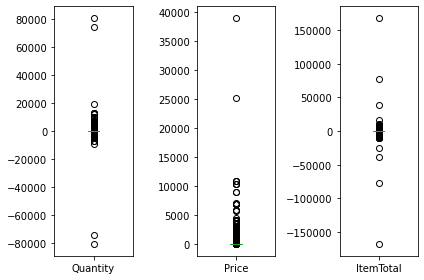

In [21]:
#box plot to check for outliers
df.plot(kind='box', y=['Quantity', 'Price', 'ItemTotal'], subplots=True)
plt.tight_layout()

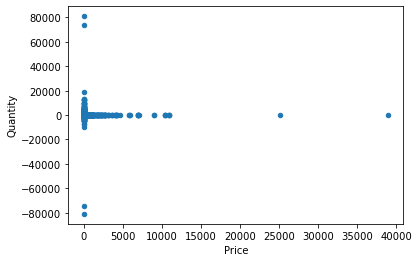

In [22]:
#scatter plot for quantity and price
df.plot(kind='scatter', x='Price', y='Quantity')

The ranges of the quantity, price, and item total are quite wide, with the highest price being almost £40,000, which is highly unlikely considering the nature of the business. We will explore a little further to see what are these high prices for.

In [23]:
#sort the dataframe by price in descending order
df.sort_values('Price',ascending=False).head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,ItemTotal
748142,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom,-38970.00
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399,United Kingdom,-25111.09
135014,C502264,M,Manual,-1,2010-03-23 15:24:00,10953.50,12918,United Kingdom,-10953.50
135012,C502262,M,Manual,-1,2010-03-23 15:20:00,10953.50,12918,United Kingdom,-10953.50
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918,United Kingdom,10953.50
342135,C522793,M,Manual,-1,2010-09-16 14:53:00,10468.80,14063,United Kingdom,-10468.80
372833,C525398,M,Manual,-1,2010-10-05 11:47:00,10468.80,14063,United Kingdom,-10468.80
358639,524159,M,Manual,1,2010-09-27 16:12:00,10468.80,14063,United Kingdom,10468.80
74357,C496116,M,Manual,-1,2010-01-29 11:05:00,8985.60,17949,United Kingdom,-8985.60
74356,496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949,United Kingdom,8985.60


We know that invoices start with "C" are returns. We can see a lot of transactions with high prices are manual inputs for returns. Now that we have a general ideas about what these "outliers" are, we will keep them for now and discuss this more later in the feature engineering section.

In [24]:
#remove outliers using winsorization
#df['Quantity_winsorized'] = winsorize(df['Quantity'], limits=[0.01, 0.01])

In [25]:
#save the data
df.to_csv('../Springboard Capstone Two/data_wrangling.csv')